In [253]:
from winspec import SpeFile
data = SpeFile("G:/マイドライブ/kanolab/Manuscripts/Murakami_BoE/Surface_analysis/Surface.spe")

In [238]:

len(data.data[0])

1340

In [239]:

import pybeads as be
import os

In [240]:
y = data.data[200].flatten()
y = y[10:]

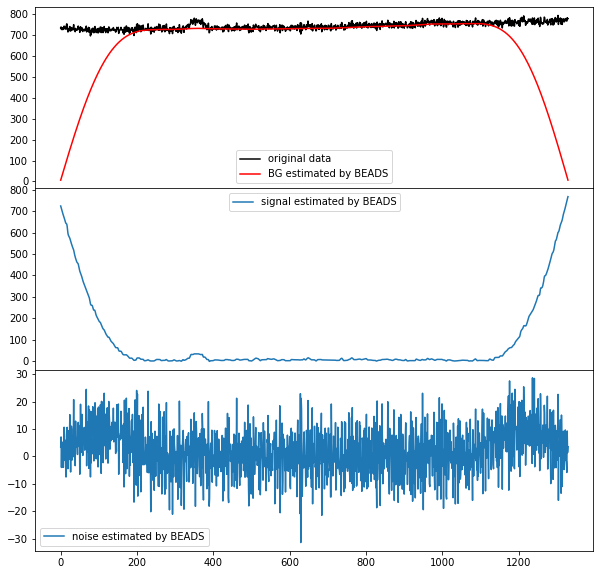

In [241]:
# try changing fc and lam0-2, amp if these dont' fit your data
fc = 0.01
d = 1
r = 6
amp = 0.8
lam0 = 0.5* amp
lam1 = 5 * amp
lam2 = 5 * amp
Nit = 15
pen = 'L1_v2'

signal_est, bg_est, cost = be.beads(y, d, fc, r, Nit, lam0, lam1, lam2, pen, conv=3)

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
fig.subplots_adjust(hspace=0)
axes[0].plot(y, c='k', label='original data')
axes[0].plot(bg_est, c='r', label='BG estimated by BEADS')
axes[0].legend()
axes[1].plot(signal_est, label='signal estimated by BEADS')
axes[1].legend()
axes[2].plot(y-signal_est-bg_est, label='noise estimated by BEADS')
axes[2].legend()
np.savetxt('intestine.csv', signal_est, delimiter=",")

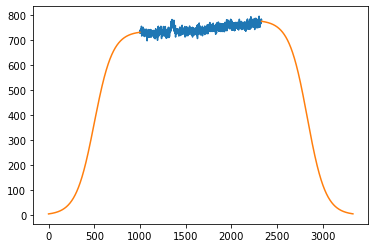

In [242]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

xscale_l, xscale_r = 100, 100
dx = 1
y_l = y[0]*sigmoid(1/xscale_l*np.arange(-5*xscale_l, 5*xscale_l, dx))
y_r = y[-1]*sigmoid(-1/xscale_r*np.arange(-5*xscale_r, 5*xscale_r, dx))
y_ext = np.hstack([y_l, y, y_r])
len_l, len_o, len_r = len(y_l), len(y), len(y_r)
plt.plot(range(len_l, len_l+len_o), y)
plt.plot(y_l, 'C1')
plt.plot(range(len_l+len_o, len_l+len_o+len_r), y_r, 'C1')

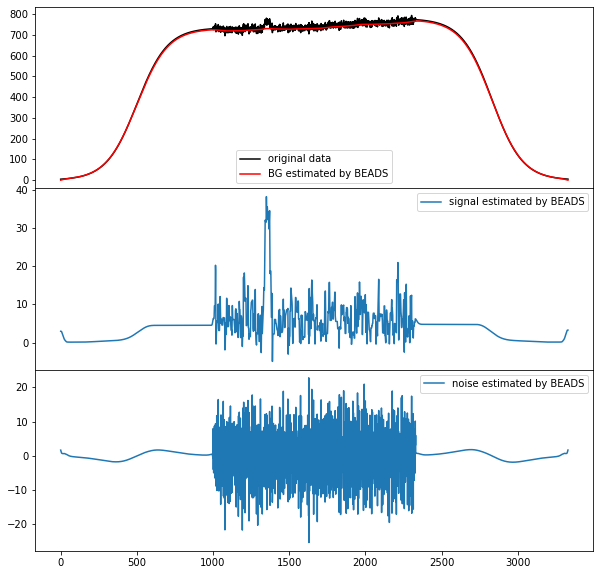

In [243]:
signal_est, bg_est, cost = be.beads(y_ext, d, fc, r, Nit, lam0, lam1, lam2, pen, conv=None)

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
fig.subplots_adjust(hspace=0)
axes[0].plot(y_ext, c='k', label='original data')
axes[0].plot(bg_est, c='r', label='BG estimated by BEADS')
axes[0].legend()
axes[1].plot(signal_est, label='signal estimated by BEADS')
axes[1].legend()
axes[2].plot(y_ext-signal_est-bg_est, label='noise estimated by BEADS')
axes[2].legend()
np.savetxt('intestine.csv', signal_est, delimiter=",")

In [254]:
data = SpeFile("G:/マイドライブ/kanolab/Manuscripts/Murakami_BoE/Surface_analysis/Surface.spe")
import pandas as pd
y = data.data

In [255]:
processed_data = np.zeros(y.shape[1])
for i in range(y.shape[0]):
  temp = y[i].flatten()
  temp = temp[10:]
  signal_est, bg_est, cost = be.beads(temp, d, fc, r, Nit, lam0, lam1, lam2, pen, conv=None)
  processed_data = np.vstack([processed_data, signal_est])
processed_data = pd.DataFrame(processed_data.T)
processed_data.to_csv("G:/マイドライブ/kanolab/Manuscripts/Murakami_BoE/Surface_analysis/processed_data.csv")

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1340 and the array at index 1 has size 1330